# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import re
import json
import numpy as np

import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 500)
pd.set_option('max_colwidth', 800)

np.random.seed(42)

In [2]:
#load csv data into dataframe

df_archive = pd.read_csv('twitter-archive-enhanced.csv')

#show top rows of dataframe

df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [3]:
#showing the rows and columns of dataframe
df_archive.shape

(2356, 17)

In [4]:
#showing the last few rows of dataframe
df_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8,10,None,None,None,None,None


In [5]:
#Information about the columns name and datatype
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [6]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
response.status_code

200

In [7]:
with open("image_predictions.tsv", mode='wb') as file:
    file.write(response.content)

In [8]:
df_image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')

In [9]:
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [10]:
df_image_predictions.shape

(2075, 12)

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [11]:
json_df = pd.read_json("tweet_json.txt", lines=True, encoding='utf-8')
json_df.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,place,possibly_sensitive,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}",32942,False,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,892420643555336193,892420643555336192,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,NaN,6886,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs®', 'screen_name': 'dog_rates', 'location': 'all our links ➜', 'description': 'Your Only Source For Professional Dog Ratings Instagram and Facebook ➜ WeRateDogs partnerships@weratedogs.com | nonprofit: @15outof10 ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀', 'url': 'https://t.co/YPc2Xq4Va2', 'entities': {'url': {'urls': [{'url': 'https://t.co/YPc2Xq4Va2', 'expanded_url': 'http://links.weratedogs.com', 'display_url': 'links.weratedogs.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 9374166, 'friends_count': 20, 'listed_count': 7829, 'created_at': 'Sun Nov 15 21:41:29 +0000 2015', 'favourites_count': 147452, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 17466..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'url': 'https://t.co/0Xxu71qeIV', 'display_url': 'pic.twitter.com/0Xxu71qeIV', 'expanded_url': 'https://twitter.com/dog_rates/status/892177421306343426/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 1055, 'h': 1200, 'resize': 'fit'}, 'small': {'w': 598, 'h': 680, 'resize': 'fit'}, 'large': {'w': 1407, 'h': 1600, 'resize': 'fit'}}}]}","{'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'url': 'https://t.co/0Xxu71qeIV', 'display_url': 'pic.twitter.com/0Xxu71qeIV', 'expanded_url': 'https://twitter.com/dog_ra

In [12]:
json_df = json_df[['id', 'favorite_count', 'retweet_count']]

In [13]:
json_df.columns = ['tweet_id', 'favorite_count', 'retweet_count']
json_df.shape

(2325, 3)

### Tidiness issues

1. Merge twitter_archive_enhanced.csv, image_predictions.tsv and tweet_json.txt into one dataframe. 

#### Define: All three table has 'tweet_id' in common so it's better to join all three table into one dataframe. I did left join to preserve all the data.

#### Code

In [14]:
complete_df = df_archive.merge(df_image_predictions, how='left', on='tweet_id').merge(json_df, how='left', on='tweet_id')

In [15]:
complete_df.shape

(2356, 30)

In [16]:
complete_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'favorite_count', 'retweet_count'],
      dtype='object')

In [17]:
complete_df.to_csv('complete_df.csv', index=False)

In [18]:
df = pd.read_csv('complete_df.csv')


#### Test

In [19]:
df.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
672,789903600034189313,NaN,NaN,2016-10-22 18:57:48 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",This is Ralphy. His dreams were just shattered. Poor pupper. 13/10 it'll be ok Ralphy https://t.co/P0kSN6rT6H,NaN,NaN,NaN,https://vine.co/v/5wPT1aBxPQZ,13,10,Ralphy,None,None,pupper,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9535.0,3815.0
1185,718613305783398402,NaN,NaN,2016-04-09 01:35:37 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Carper. He's a Tortellini Angiosperm. In desperate need of a petting. 11/10 would hug softly https://t.co/lK9YDkRzPj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/718613305783398402/photo/1,11,10,Carper,None,None,None,None,https://pbs.twimg.com/media/CfkG_PMWsAAH0MZ.jpg,1.0,Labrador_retriever,0.584580,True,German_short-haired_pointer,0.340657,True,Chesapeake_Bay_retriever,0.031975,True,2193.0,423.0
1652,683481228088049664,NaN,NaN,2016-01-03 02:53:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Banjo. He's a Peppercorn Shoop Da Whoop. Nails look lethal. Skeptical of luminescent orb 11/10 stay woke pupper https://t.co/H7NZFumpKq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/683481228088049664/photo/1,11,10,Banjo,None,None,pupper,None,https://pbs.twimg.com/media/CXw2jSpWMAAad6V.jpg,1.0,keeshond,0.508951,True,chow,0.442016,True,German_shepherd,0.013206,True,2398.0,889.0
611,797165961484890113,7.971238e+17,29166305.0,2016-11-11 19:55:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@JODYHiGHROLLER it may be an 11/10 but what do I know 😉,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,208.0,24.0
179,857214891891077121,8.571567e+17,180670967.0,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,199.0,16.0
1927,674051556661161984,NaN,NaN,2015-12-08 02:23:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Lucy. She knits. Specializes in toboggans. 10/10 I'd buy a toboggan from Lucy https://t.co/YE2XDHy4Yk,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674051556661161984/photo/1,10,10,Lucy,None,None,None,None,https://pbs.twimg.com/media/CVq2UHwWEAAduMw.jpg,1.0,Shih-Tzu,0.179777,True,badger,0.160580,False,three-toed_sloth,0.132154,False,1268.0,423.0
1561,688385280030670848,NaN,NaN,2016-01-16 15:40:14 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Louis. He's takes top-notch selfies. 12/10 would snapchat with https://t.co/vz2DukO0th,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/688385280030670848/photo/1,https://twitter.com/dog_rates/status/688385280030670848/photo/1,https://twitter.com/dog_rates/status/688385280030670848/photo/1,https://twitter.com/dog_rates/status/688385280030670848/photo/1",12,10,Louis,None,None,None,None,https://pbs.twimg.com/media/CY2iwGNWUAI5zWi.jpg,2.0,golden_retriever,0.900437,True,cocker_spaniel,0.022292,True,sombrero,0.014997,False,8351.0,4023.0
1694,681281657291280384,NaN,NaN,2015-12-28 01:12:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sarge. His parents signed him up for dancing lessons but his true passion is roller coasters 11/10 very petable https://t.co/KvVoBIgkje,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681281657291280384/photo/1,11,10,Sarge,None,None,None,N

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [20]:
# Datatype and value of column of complete DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
jpg_url                       20

In [21]:
df.shape

(2356, 30)

In [22]:
df.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
jpg_url                       2009
img_num                          4
p1                             378
p1_conf                       2006
p1_dog                           2
p2                             405
p2_conf                       2004
p2_dog                           2
p3                             408
p3_conf                       2006
p3_dog                           2
favorite_count      

In [23]:
df.name.value_counts()

None        745
a            55
Charlie      12
Oliver       11
Lucy         11
Cooper       11
Tucker       10
Penny        10
Lola         10
Bo            9
Winston       9
the           8
Sadie         8
Toby          7
Buddy         7
an            7
Bailey        7
Daisy         7
Milo          6
Rusty         6
Koda          6
Stanley       6
Jax           6
Leo           6
Oscar         6
Scout         6
Bella         6
Dave          6
Jack          6
Phil          5
           ... 
Noosh         1
Taz           1
Gustav        1
Blipson       1
Callie        1
Buckley       1
Mason         1
Tino          1
Cannon        1
Livvie        1
Bones         1
Jett          1
Edmund        1
Duchess       1
Trevith       1
Derby         1
Iggy          1
Kona          1
Batdog        1
Willem        1
Superpup      1
Pepper        1
Bradlay       1
Kingsley      1
Chubbs        1
Shikha        1
Orion         1
Flash         1
Sprout        1
Beya          1
Name: name, Length: 957,

In [24]:
df.sample(100)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726643068929/photo/1,26,10,None,None,None,None,None,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,1.0,kuvasz,0.438627,True,Samoyed,0.111622,True,Great_Pyrenees,0.064061,True,1539.0,428.0
1634,684225744407494656,6.842229e+17,4.196984e+09,2016-01-05 04:11:44 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/684225744407494656/photo/1,https://twitter.com/dog_rates/status/684225744407494656/photo/1",143,130,None,None,None,None,None,https://pbs.twimg.com/media/CX7br3HWsAAQ9L1.jpg,2.0,golden_retriever,0.203249,True,Samoyed,0.067958,True,Great_Pyrenees,0.065327,True,1115.0,182.0
1074,739844404073074688,NaN,NaN,2016-06-06 15:40:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Simba. He's the grand prize. The trophy is just for participation. 12/10 would pet so damn well https://t.co/4qiuC0lXq5,NaN,NaN,NaN,https://twitter.com/dog_rates/status/739844404073074688/photo/1,12,10,Simba,None,None,None,None,https://pbs.twimg.com/media/CkR0jrhWYAALL5N.jpg,1.0,toy_poodle,0.342397,True,table_lamp,0.104451,False,miniature_poodle,0.079871,True,3444.0,776.0
2080,670823764196741120,NaN,NaN,2015-11-29 04:37:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Remington. He's a man dime. 12/10 https://t.co/m3ufSDwHHJ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670823764196741120/photo/1,12,10,Remington,None,None,None,None,https://pbs.twimg.com/media/CU8-puBWwAAR8Xl.jpg,1.0,Labrador_retriever,0.947453,True,German_short-haired_pointer,0.017001,True,Weimaraner,0.015432,True,657.0,157.0
248,845397057150107648,NaN,NaN,2017-03-24 22:08:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Say hello to Mimosa. She's an emotional support doggo who helps her owner with PTSD. 13/10, but she needs your help\n\nhttps://t.co/L6mLzrd7Mx https://t.co/jMutBFdw5o",NaN,NaN,NaN,"https://www.gofundme.com/help-save-a-pup,https://twitter.com/dog_rates/status/845397057150107648/photo/1,https://twitter.com/dog_rates/status/845397057150107648/photo/1",13,10,Mimosa,doggo,None,None,None,https://pbs.twimg.com/media/C7t0IzLWkAINoft.jpg,1.0,Dandie_Dinmont,0.394404,True,Maltese_dog,0.186537,True,West_Highland_white_terrier,0.181985,True,6900.0,1591.0
1812,676811746707918848,NaN,NaN,2015-12-15 17:11:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Penny &amp; Gizmo. They are practicing their caroling. The ambition in the room is tangible. 9/10 for both https://t.co/aqBHjjh5VD,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676811746707918848/photo/1,9,10,Penny,None,None,None,None,https://pbs.twimg.com/media/CWSEsO9WwAAX-fZ.jpg,1.0,Chihuahua,0.440916,True,Pomeranian,0.345806,True,cocker_spaniel,0.060331,True,1280.0,370.0
1121,730924654643314689,NaN,NaN,2016-05-13 00:56:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We only rate dogs. Pls stop sending non-canines like this Bulgarian Eyeless Porch Bear. This is unacceptable... 9/10 https://t.co/2yctWAUZ3Z,NaN,NaN,NaN,http

In [25]:
df.duplicated().sum()

0

In [26]:
df.expanded_urls.isnull().value_counts()

False    2297
True       59
Name: expanded_urls, dtype: int64

In [27]:
#checking for row index that are null
df[df['expanded_urls'].isnull()].index.value_counts()

1663    1
218     1
1598    1
701     1
189     1
570     1
313     1
1080    1
55      1
1689    1
179     1
427     1
188     1
1446    1
291     1
1345    1
290     1
30      1
1819    1
409     1
185     1
148     1
274     1
1295    1
1940    1
576     1
2189    1
387     1
64      1
1474    1
857     1
2149    1
1844    1
1914    1
113     1
375     1
2038    1
1523    1
498     1
342     1
1774    1
1005    1
234     1
1895    1
228     1
707     1
611     1
1445    1
346     1
1497    1
1905    1
186     1
1618    1
843     1
2298    1
1479    1
967     1
1605    1
513     1
dtype: int64

In [28]:
#checking for missing values by value_count
df.retweeted_status_id.isnull().value_counts()

True     2175
False     181
Name: retweeted_status_id, dtype: int64

In [29]:
df.in_reply_to_status_id.isnull().value_counts()

True     2278
False      78
Name: in_reply_to_status_id, dtype: int64

In [30]:
#checking for unique value
df.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja',
       'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose',
       'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra',
       'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn',
       'Boomer', 'Cody', 'Rumble', 'Clifford', 'quite', 'Dewey', 'Scout',
       'Gizmo', 'Cooper', 'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy',
       'Meatball', 'Paisley', 'Albus', 'Neptune', '

In [31]:
df[['doggo','floofer','pupper','puppo']].sum(axis=1).unique()

array(['NoneNoneNoneNone', 'doggoNoneNoneNone', 'NoneNoneNonepuppo',
       'NoneNonepupperNone', 'NoneflooferNoneNone', 'doggoNoneNonepuppo',
       'doggoflooferNoneNone', 'doggoNonepupperNone'], dtype=object)

### Quality issues
1. tweet_id has dtype int64 and should be object.

2. Remove all retweets (status and reply) rows--> retweeted_status_id, in_reply_to_status_id.

3. Need to drop unwanted columns -->  retweeted_status_id, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_user_id,retweeted_status_timestamp.

4. Timestamp is in str format not datetime foramt.

5. tweets with no image (out of 2356 rows, 2297 have image)

6. Many dogs name are not correct or missing. Several has names like 'a', 'quite' , 'an' , 'the' etc.

7. p1, p2, p3 columns should be all lower case and '_', '-' needs to be removed.

8. For some dog style (doggo, floofer, pupper, puppo) few has more than one style.

### Tidiness issues
1. Group the 4 different class of dog (doggo, floofer, pupper, puppo) into one column

2. Merge twitter_archive_enhanced.csv, image_predictions.tsv and tweet_json.txt into one table. 

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [32]:
# Make copies of original pieces of data
df_clean = complete_df.copy()

### Issue #1: tweet_id has dtype int64 and should be object.

#### Define: Twitter_id should be in str format intead of int format.

#### Code

In [33]:
df_clean['tweet_id'] = df_clean.tweet_id.astype('str')

#### Test

In [34]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
jpg_url                       2

### Issue #2: Remove all retweets (status and reply) rows--> retweeted_status_id, in_reply_to_status_id.

#### Define: As per project guideline we only want the original tweets, no retweet or reply.

#### Code

In [35]:
df_clean = df_clean[df_clean['in_reply_to_status_id'].isnull()]
df_clean = df_clean[df_clean['retweeted_status_id'].isnull()]

#### Test

In [36]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      2097 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
jpg_url                       1971 non-

### Issue #3: Need to drop unwanted columns -->  retweeted_status_id, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_user_id,retweeted_status_timestamp.

#### Define
we need to drop unwanted columns (retweeted_status_id, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_user_id,retweeted_status_timestamp) which are not required for this analysis.

#### Code

In [37]:
df_clean.drop(columns = ['in_reply_to_status_id', 'in_reply_to_user_id'], inplace=True)

In [38]:
df_clean.drop(columns = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace=True)

#### Test

In [39]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 25 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null object
p3                    1971 non-n

### Issue #4: Timestamp is in str format not datetime foramt.

#### Define
Timestamp is in str format, so it needed to be converted to datetime format

#### Code

In [40]:
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'])

#### Test

In [41]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 25 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null object
p3                    19

### Issue #5:  tweets with no image (out of 2356 rows, 2297 have image)

#### Define
we need to remove all rows that in null in expanded_url and jp_url columns

#### Code

In [42]:
df_clean = df_clean.dropna(subset=['expanded_urls'])

In [43]:
df_clean = df_clean.dropna(subset=['jpg_url'])

#### Test

In [44]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 25 columns):
tweet_id              1971 non-null object
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
doggo                 1971 non-null object
floofer               1971 non-null object
pupper                1971 non-null object
puppo                 1971 non-null object
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null object
p3                    19

### Issue #6:  Many dogs name are not correct or missing. Several has names like 'a', 'quite' , 'an' , 'the' etc.

#### Define
Several dogs name are not correct, which contain names like 'a', 'the', 'all', 'quite', 'such', 'an'. etc. From visual assesment we saw that they all are lowercase letter, which we will extract by regex and then replace them with 'None' and finally replace all 'None' with 'NaN'.

#### Code

In [45]:
stop_word = df_clean.name.str.contains('^[a-z]', regex=True)
indices = df_clean[stop_word].name.index.tolist()
df_clean.at[indices, 'name'] = 'None'
df_clean.name.replace('None', np.nan, inplace=True)

#### Test

In [46]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 25 columns):
tweet_id              1971 non-null object
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1349 non-null object
doggo                 1971 non-null object
floofer               1971 non-null object
pupper                1971 non-null object
puppo                 1971 non-null object
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null object
p3                    19

### Issue #7:  p1, p2, p3 columns should be all lower case and '_', '-' needs to be removed.

#### Define
There is inconsistency with dog breed name. Some are upper case on first letter, some have lower case for first letter and also mix of upper and lower case letter and '_', '-' in between names. We will use capitalize() for consistence first capital letter and remove '_', '-' using regex.

#### Code

In [47]:
df_clean['p1'] = df_clean['p1'].str.capitalize()
df_clean['p1'] = df_clean['p1'].str.replace('[\W\-\_]', ' ')
df_clean['p2'] = df_clean['p2'].str.capitalize()
df_clean['p2'] = df_clean['p2'].str.replace('[\W\-\_]', ' ')
df_clean['p3'] = df_clean['p3'].str.capitalize()
df_clean['p3'] = df_clean['p3'].str.replace('[\W\-\_]', ' ')

#### Test

In [48]:
df_clean.sample(100)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 25 columns):
tweet_id              1971 non-null object
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1349 non-null object
doggo                 1971 non-null object
floofer               1971 non-null object
pupper                1971 non-null object
puppo                 1971 non-null object
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null object
p3                    19

### Issue #8:  For some dog style (doggo, floofer, pupper, puppo) few has more than one style.

#### Define
For the column of ['doggo', 'floofer', 'pupper', 'puppo' ] for some rows they 2 values like 'doggo' and 'puppo', 'doggo' and 'floofer' etc. We will find those rows by index and remove the wrong one by gathering info from text column. 

#### Code

In [49]:
df_clean[['doggo','floofer','pupper','puppo']].replace('None', '').sum(1).unique()

array(['', 'doggo', 'puppo', 'pupper', 'floofer', 'doggopuppo',
       'doggofloofer', 'doggopupper'], dtype=object)

In [50]:
df_clean.query('doggo == "doggo" and puppo == "puppo"')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
191,855851453814013952,2017-04-22 18:31:02,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,https://twitter.com/dog_rates/status/855851453814013952/photo/1,13,10,NaN,doggo,None,None,puppo,https://pbs.twimg.com/media/C-CYWrvWAAU8AXH.jpg,1.0,Flat coated retriever,0.321676,True,Labrador retriever,0.115138,True,Groenendael,0.0961,True,40389.0,15733.0


In [51]:
df_clean.at[191,'doggo'] = ''

In [52]:
df_clean.query('doggo == "doggo" and floofer == "floofer"')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
200,854010172552949760,2017-04-17 16:34:26,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk","https://twitter.com/dog_rates/status/854010172552949760/photo/1,https://twitter.com/dog_rates/status/854010172552949760/photo/1",11,10,NaN,doggo,floofer,None,None,https://pbs.twimg.com/media/C9oNt91WAAAFSLS.jpg,1.0,English springer,0.354733,True,Collie,0.177538,True,Border collie,0.131706,True,14402.0,2751.0


In [53]:
df_clean.at[200,'doggo'] = ''

In [54]:
df_clean.query('doggo == "doggo" and pupper == "pupper"').index.tolist()

[460, 531, 575, 705, 889, 956, 1063, 1113]

In [55]:
df_clean.query('doggo == "doggo" and pupper == "pupper"')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
460,817777686764523521,2017-01-07 16:59:28,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",https://twitter.com/dog_rates/status/817777686764523521/video/1,13,10,Dido,doggo,None,pupper,None,https://pbs.twimg.com/ext_tw_video_thumb/817777588030476288/pu/img/KbuLpE4krHF4VdPf.jpg,1.0,Curly coated retriever,0.733256,True,Flat coated retriever,0.214145,True,Irish water spaniel,0.029769,True,9973.0,2484.0
531,808106460588765185,2016-12-12 00:29:28,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,https://twitter.com/dog_rates/status/808106460588765185/photo/1,12,10,NaN,doggo,None,pupper,None,https://pbs.twimg.com/media/Czb4iFRXgAIUMiN.jpg,1.0,Golden retriever,0.426183,True,Labrador retriever,0.257447,True,Great pyrenees,0.126482,True,8181.0,2032.0
575,801115127852503040,2016-11-22 17:28:25,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,"https://twitter.com/dog_rates/status/801115127852503040/photo/1,https://twitter.com/dog_rates/status/801115127852503040/photo/1",12,10,Bones,doggo,None,pupper,None,https://pbs.twimg.com/media/Cx4h7zHUsAAqaJd.jpg,1.0,Dalmatian,0.823356,True,English setter,0.094602,True,Bluetick,0.021953,True,7481.0,1960.0
705,785639753186217984,2016-10-11 00:34:48,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,"https://twitter.com/dog_rates/status/785639753186217984/photo/1,https://twitter.com/dog_rates/status/785639753186217984/photo/1",10,10,Pinot,doggo,None,pupper,None,https://pbs.twimg.com/media/CucnLmeWAAALOSC.jpg,1.0,Porcupine,0.978042,False,Sea urchin,0.006106,False,Echidna,0.005442,False,7238.0,2077.0
889,759793422261743616,2016-07-31 16:50:42,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll","https://twitter.com/dog_rates/status/759793422261743616/photo/1,https://twitter.com/dog_rates/status/759793422261743616/photo/1",12,10,Maggie,doggo,None,pupper,None,https://pbs.twimg.com/media/CotUFZEWcAA2Pku.jpg,2.0,Golden retriever,0.985876,True,Labrador retriever,0.001948,True,Kuvasz,0.001752,True,5449.0,1738.0
956,751583847268179968,2016-07-09 01:08:47,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8,https://twitter.com/dog_rates/status/751583847268179968/photo/1,5,10,NaN,doggo,None,pupper,None,https://pbs.twimg.com/media/Cm4phTpWcAAgLsr.jpg,1.0,Dalmatian,0.868304,True,Studio couch,0.059623,False,Snow leopard,0.013876,False,3992.0,993.0
1063,741067306818797568,2016-06-10 00:39:48,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,https://twitter.com/dog_rates/status/741067306818797568/photo/1,12,10,NaN,doggo,None,pupper,None,https://pbs.twimg.com/media/

In [56]:
df_clean.at[460,'doggo'] = ''
df_clean.at[575,'doggo'] = ''
df_clean.at[705,'pupper'] = ''
df_clean.at[889,'pupper'] = ''
df_clean.drop(index=[531,956,1063,1113], inplace=True)

In [57]:
df_clean[['doggo','floofer','pupper','puppo']].replace('', np.nan).sum(1).unique()

array([ 0.])

#### Test

In [58]:
df_clean.query('doggo == "doggo" and puppo == "puppo"')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count


In [59]:
df_clean.query('doggo == "doggo" and floofer == "floofer"')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count


In [60]:
df_clean.query('doggo == "doggo" and pupper == "pupper"')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count


In [61]:
df_clean[['doggo','floofer','pupper','puppo']].sum(1).unique()

array(['NoneNoneNoneNone', 'doggoNoneNoneNone', 'NoneNoneNonepuppo',
       'NoneNonepupperNone', 'NoneflooferNoneNone', 'NoneNonepuppo',
       'flooferNoneNone', 'NonepupperNone', 'doggoNoneNone'], dtype=object)

In [62]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1967 entries, 0 to 2355
Data columns (total 25 columns):
tweet_id              1967 non-null object
timestamp             1967 non-null datetime64[ns]
source                1967 non-null object
text                  1967 non-null object
expanded_urls         1967 non-null object
rating_numerator      1967 non-null int64
rating_denominator    1967 non-null int64
name                  1349 non-null object
doggo                 1967 non-null object
floofer               1967 non-null object
pupper                1967 non-null object
puppo                 1967 non-null object
jpg_url               1967 non-null object
img_num               1967 non-null float64
p1                    1967 non-null object
p1_conf               1967 non-null float64
p1_dog                1967 non-null object
p2                    1967 non-null object
p2_conf               1967 non-null float64
p2_dog                1967 non-null object
p3                    19

### Tidiness issues
1. Group the 4 different class of dog (doggo, floofer, pupper, puppo) into one column

2. Merge twitter_archive_enhanced.csv, image_predictions.tsv and tweet_json.txt into one table. [Note: I already merged the table before assesing the data. Thus, i will show work for the part 1 of tidiness issue.]

### Tidiness Issue #1:  Group the 4 different class of dog (doggo, floofer, pupper, puppo) into one column.

#### Define
The 4 dog_class column ['doggo', 'floofer', 'pupper', 'puppo' ] should be in a single column. Seperated in 4 different column is a tidiness issue.

#### Code

In [63]:
dog_class = ['doggo','floofer','pupper','puppo']
for i in dog_class:
    df_clean[i] = df_clean[i].replace('None', '')

In [64]:
df_clean['dog_class'] = df_clean.doggo.str.cat(df_clean.floofer).str.cat(df_clean.pupper).str.cat(df_clean.puppo)

In [65]:
df_clean = df_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)
df_clean['dog_class'] = df_clean['dog_class'].replace('', np.nan)

#### Test

In [66]:
df_clean.sample(100)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,dog_class
1315,706681918348251136,2016-03-07 03:24:33,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Katie. She's a Mitsubishi Hufflepuff. Curly af. 12/10 I'd do terrible things to acquire such a pup https://t.co/CFPIcGcwJv,"https://twitter.com/dog_rates/status/706681918348251136/photo/1,https://twitter.com/dog_rates/status/706681918348251136/photo/1,https://twitter.com/dog_rates/status/706681918348251136/photo/1",12,10,Katie,https://pbs.twimg.com/media/Cc6jcYRXIAAFuox.jpg,1.0,Toy poodle,0.717584,True,Miniature poodle,0.151433,True,Norwich terrier,0.047087,True,2962.0,881.0,NaN
1881,675003128568291329,2015-12-10 17:24:21,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Laela. She's adorable. Magnificent eyes. But I don't see a seat belt. Insubordinate.. and churlish. Still 12/10 https://t.co/pCGDgLkLo6,"https://twitter.com/dog_rates/status/675003128568291329/photo/1,https://twitter.com/dog_rates/status/675003128568291329/photo/1",12,10,Laela,https://pbs.twimg.com/media/CV4XwYiWoAAHQIF.jpg,1.0,Pembroke,0.655279,True,Pomeranian,0.104164,True,Cardigan,0.052818,True,1358.0,398.0,NaN
1072,739979191639244800,2016-06-07 00:36:02,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Nollie. She's waving at you. If you don't wave back you're a monster. She's also portable as hell. 12/10 https://t.co/7AKdkCOlMf,https://twitter.com/dog_rates/status/739979191639244800/photo/1,12,10,Nollie,https://pbs.twimg.com/media/CkTvJTdXAAAEfbT.jpg,1.0,Irish water spaniel,0.285800,True,Wig,0.240653,False,Toy poodle,0.074914,True,18051.0,5283.0,NaN
407,823699002998870016,2017-01-24 01:08:40,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Winston. The goggles make him a superhero. Protects the entire city from criminals unless they rub his belly really well. 12/10 https://t.co/yCydYURYEL,https://twitter.com/dog_rates/status/823699002998870016/photo/1,12,10,Winston,https://pbs.twimg.com/media/C25d3nkXEAAFBUN.jpg,1.0,Cairn,0.203999,True,Snorkel,0.171893,False,Norfolk terrier,0.107543,True,12740.0,2282.0,NaN
1329,705898680587526145,2016-03-04 23:32:15,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Max. He's a Fallopian Cephalopuff. Eyes are magical af. Lil dandruff problem. No big deal 10/10 would still pet https://t.co/c67nUjwmFs,"https://twitter.com/dog_rates/status/705898680587526145/photo/1,https://twitter.com/dog_rates/status/705898680587526145/photo/1",10,10,Max,https://pbs.twimg.com/media/CcvbGj5W8AARjB6.jpg,1.0,Collie,0.808276,True,Border collie,0.059437,True,Groenendael,0.026720,True,2131.0,487.0,NaN
140,865006731092295680,2017-05-18 00:50:50,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Nelly. He really hopes you like his Hawaiian shirt. He already tore the tags off. 13/10 h*ck of a puppurchase https://t.co/LbkG5CiM7o,https://twitter.com/dog_rates/status/865006731092295680/photo/1,13,10,Nelly,https://pbs.twimg.com/media/DAEfCFXUIAA1uqj.jpg,1.0,Pembroke,0.989882,True,Cardigan,0.009906,True,Basenji,0.000135,True,24389.0,6562.0,NaN
254,844580511645339650,2017-03-22 16:04:20,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Charlie. He wants to know if you have a moment to talk about washing machine insurance policies. 11/10 would hear him out https://t.co/gAzPqT7uyk,https://twitter.com/dog_rates/status/844580511645339650/photo/1,11,10,Charlie,https://pbs.twimg.com/media/C7iNfq1W0AAcbsR.jpg,1.0,Washer,0.903064,False,Dishwasher,0.032489,False,Printer,0.016456,False,14861.0,2775.0,NaN
1629,684567543613382656,2016-01-06 02:49:55,"<a href=""

In [67]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1967 entries, 0 to 2355
Data columns (total 22 columns):
tweet_id              1967 non-null object
timestamp             1967 non-null datetime64[ns]
source                1967 non-null object
text                  1967 non-null object
expanded_urls         1967 non-null object
rating_numerator      1967 non-null int64
rating_denominator    1967 non-null int64
name                  1349 non-null object
jpg_url               1967 non-null object
img_num               1967 non-null float64
p1                    1967 non-null object
p1_conf               1967 non-null float64
p1_dog                1967 non-null object
p2                    1967 non-null object
p2_conf               1967 non-null float64
p2_dog                1967 non-null object
p3                    1967 non-null object
p3_conf               1967 non-null float64
p3_dog                1967 non-null object
favorite_count        1959 non-null float64
retweet_count         

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [68]:
df_clean.to_csv("twitter_archive_master.csv", index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [69]:
df_master_clean = pd.read_csv('twitter_archive_master.csv')

### favorite_count vs. retweet_count

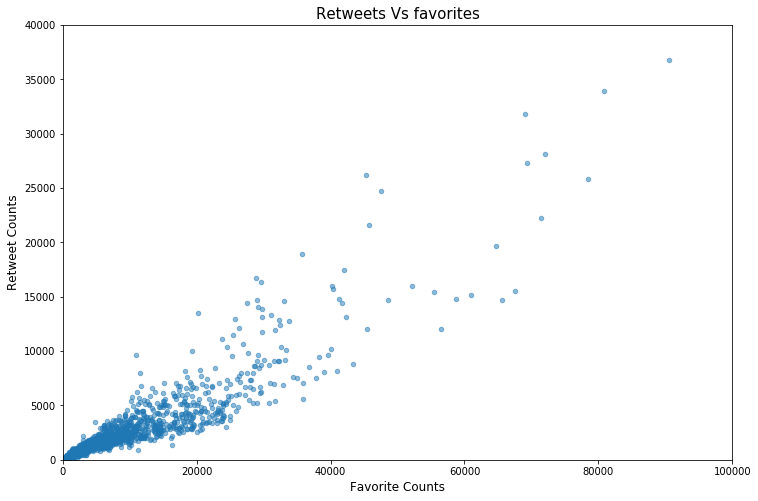

In [70]:
df_master_clean.plot(kind='scatter', x = 'favorite_count', y = 'retweet_count', alpha = 0.5, figsize = (12,8))
plt.xlim((0,100000))
plt.ylim((0,40000))
plt.xlabel('Favorite Counts', fontsize=12)
plt.ylabel('Retweet Counts', fontsize=12)
plt.title('Retweets Vs favorites', fontsize=15)
plt.savefig('retweet vs. favorite.png', dpi=300)

### Insights:
We see that there is a strong positive correlation between favorite and retweet count. But they are scatterd mostly at the start.

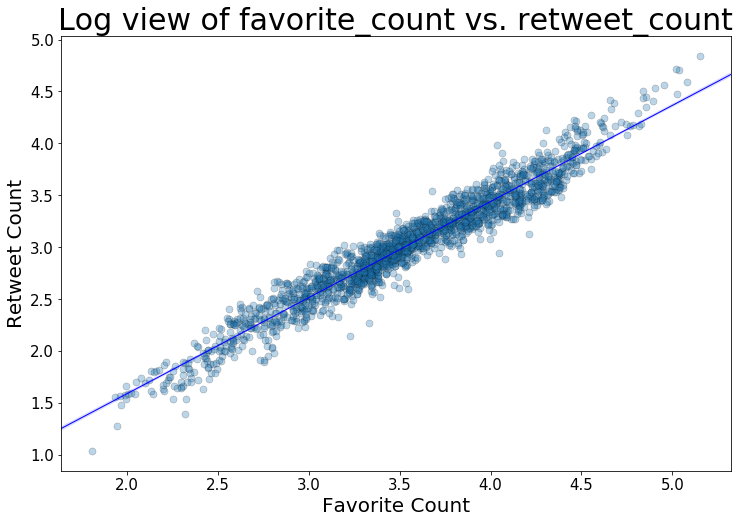

In [71]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.regplot(data = df_master_clean, x=np.log10(df_master_clean.favorite_count), y=np.log10(df_master_clean.retweet_count), fit_reg=True,
            scatter_kws=dict(alpha=0.3,s=50, edgecolor='black', linewidth=0.5), line_kws = dict(ls='-',lw=1, color='blue'))
plt.title('Log view of favorite_count vs. retweet_count', fontsize=30)
plt.xlabel('Favorite Count', fontsize=20)
plt.ylabel('Retweet Count',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('Log view of favorite_count vs. retweet_count.png', dpi=300)

### Insights:
From the log transformation we can clearly see that favorite_count and retweet_count are highly correlated and have liner relation between them.

### Analysis of dog_class


In [72]:
df_master_clean.dog_class.value_counts()

pupper     203
doggo       65
puppo       23
floofer      8
Name: dog_class, dtype: int64

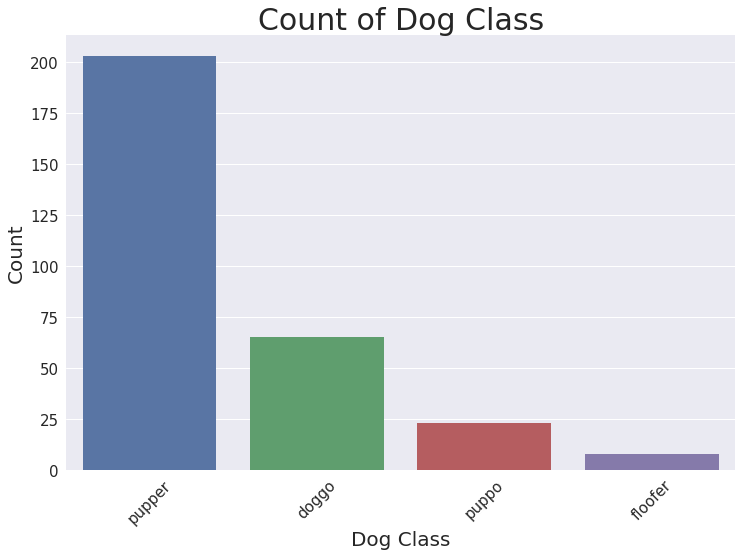

In [73]:
sns.set()
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.countplot(data=df_master_clean, x='dog_class', order=df_master_clean.dog_class.value_counts().index)
plt.xlabel('Dog Class', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Count of Dog Class', fontsize=30)
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('count of dog class.png', dpi=300)

### Insights:
From Analysis of dog_class visualization we can see that pupper is the most popular dog_class with 203 tweet count and floofer is least popular with 8 tweet count with doggo and puppo having 65 and 23 tweet count respectively. For this visualization i have used the dog_class column.





### Most Popular dog breeds

In [74]:
df_master_clean.p1.value_counts()[0:10]

Golden retriever      134
Labrador retriever     94
Pembroke               88
Chihuahua              78
Pug                    54
Chow                   41
Samoyed                40
Pomeranian             38
Toy poodle             37
Malamute               29
Name: p1, dtype: int64

In [75]:
df_master_clean.p2.value_counts()[0:10]

Labrador retriever          92
Golden retriever            82
Cardigan                    73
Chihuahua                   43
Chesapeake bay retriever    40
French bulldog              39
Pomeranian                  38
Toy poodle                  36
Siberian husky              33
Cocker spaniel              32
Name: p2, dtype: int64

In [76]:
df_master_clean.p3.value_counts()[0:10]

Labrador retriever           76
Chihuahua                    57
Golden retriever             45
Eskimo dog                   36
Kelpie                       32
Kuvasz                       31
Staffordshire bullterrier    30
Chow                         30
Beagle                       29
Cocker spaniel               29
Name: p3, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

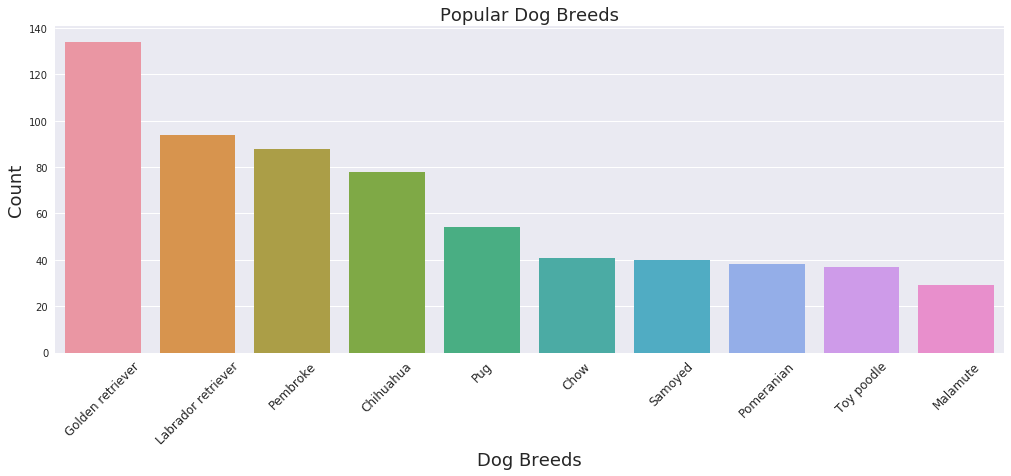

In [77]:
plt.figure(figsize = (17,6))
ax = sns.barplot(data = df_master_clean, x = df_master_clean[('p1')].value_counts()[0:10].index,
            y =df_master_clean[('p1')].value_counts()[0:10])
plt.xlabel("Dog Breeds",fontsize = 18)
plt.ylabel("Count",fontsize = 18)
plt.title("Popular Dog Breeds",fontsize = 18)
plt.xticks(rotation=45, fontsize=12)

In [78]:
df_master_clean = df_master_clean.melt(id_vars = 'tweet_id', value_vars=['p1','p2','p3'], value_name='dog_breed')
df_master_clean.dog_breed.value_counts()[0:10]

Labrador retriever    262
Golden retriever      261
Chihuahua             178
Pembroke              138
Cardigan              113
Pomeranian            103
Toy poodle            102
Pug                    92
Chow                   91
French bulldog         90
Name: dog_breed, dtype: int64

In [ ]:
plt.figure(figsize = (20,10))
ax = sns.barplot(data = df_master_clean, x = df_master_clean[('dog_breed')].value_counts()[0:10].index,
            y =df_master_clean[('dog_breed')].value_counts()[0:10]);
plt.xlabel("Dog Breeds",fontsize = 18)
plt.ylabel("Count",fontsize = 18)
plt.title("Popular Dog Breeds",fontsize = 18)
plt.xticks(rotation=45, fontsize=12)
plt.savefig('popular dog breed.png', dpi=300)

### Insights:
We can see that Labrador retriever is the most popular dog breed even it is just by one more than golden retriver. For this process i first melt function on 'p1', 'p2', 'p3' column to make it one single column named 'dog_breed'. Then used the seaborn barplot for the visualization. 

